# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [128]:
import pandas as pd
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

demo_dummies = 'demo_dummy01.csv'
df = pd.read_csv(demo_dummies)

In [130]:
# Separando 70% para treinamento e 30% para validação
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['mau']),  # Variáveis explicativas (sem a variável resposta)
    df['mau'],  # Variável resposta
    test_size=0.3,  # Proporção para validação (30%)
    random_state=42  # Seed para reprodutibilidade
)

In [132]:
#Resultado
X_train #DataFrame com as variáveis explicativas para treinamento.
y_train #Série com a variável resposta para treinamento.
X_test #DataFrame com as variáveis explicativas para validação.
y_test #Série com a variável resposta para validação.

15596    False
12689    False
7879     False
16136    False
12786    False
         ...  
6929     False
2287     False
15162    False
14753    False
11913    False
Name: mau, Length: 4995, dtype: bool

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [134]:
# 2.1. Definir um objeto com a função da árvore de decisão
# Criando o objeto da árvore de decisão
clf = DecisionTreeClassifier()

In [136]:
# 2.2. Treinar o modelo com os dados de treinamento

clf.fit(X_train, y_train)

DecisionTreeClassifier()

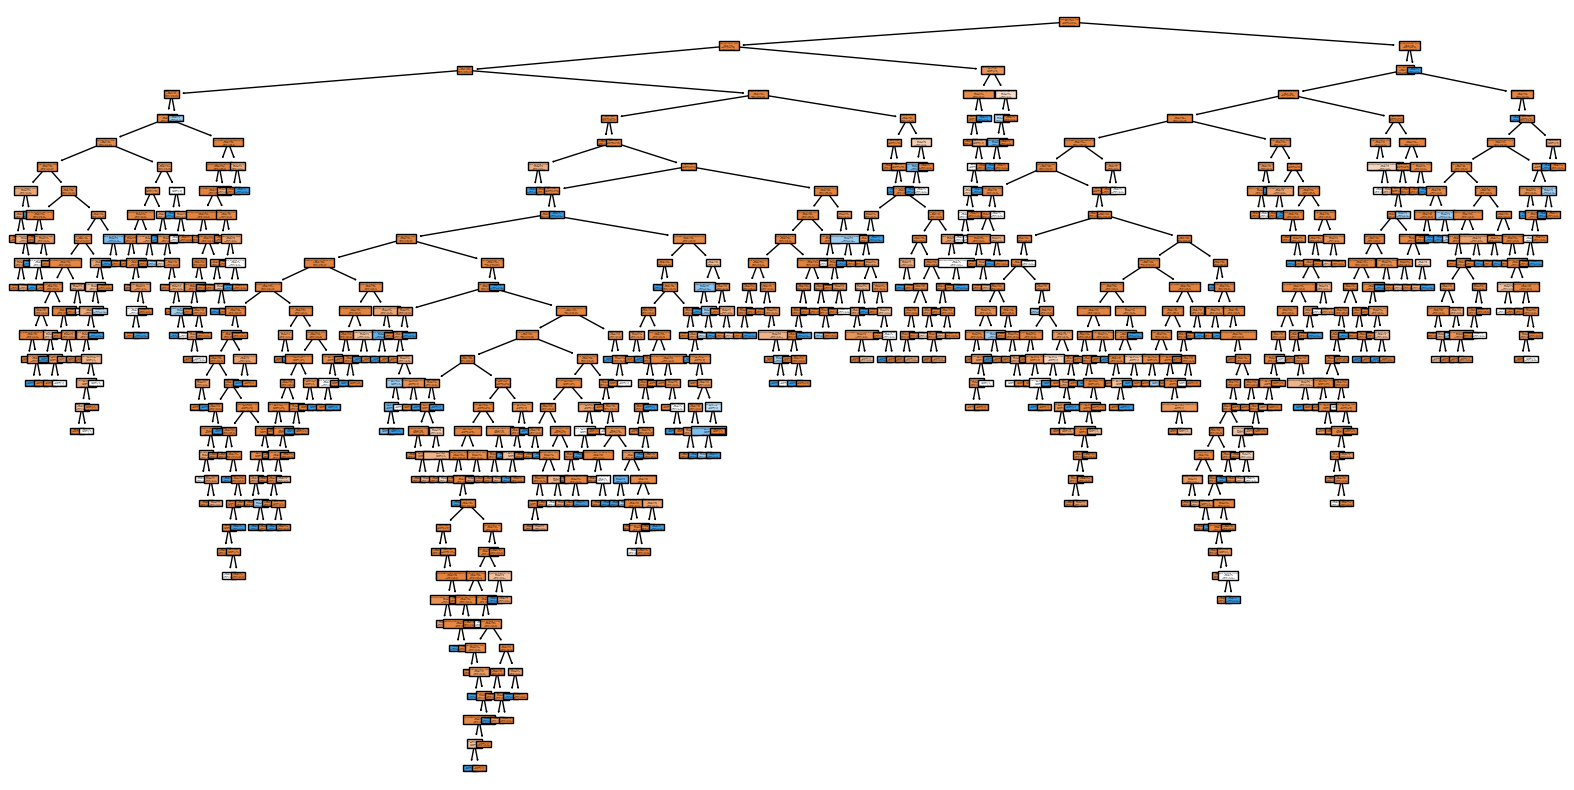

In [138]:
# 2.3. Visualizar a árvore

plt.figure(figsize=(20,10))  # Ajustar o tamanho da figura
plot_tree(clf, filled=True, class_names=["aprovados", "reprovados"], feature_names=X_train.columns)
plt.show()

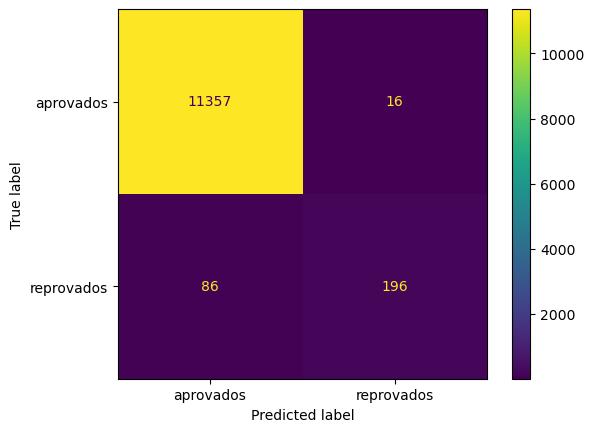

In [139]:
# 2.4. Produzir uma visualização da matriz de confusão

# Fazendo previsões no conjunto de treino
pred_train = clf.predict(X_train)

# Visualizando a matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_train, pred_train, display_labels=["aprovados", "reprovados"])
plt.show()

In [140]:
# 2.5. Calcular a acurácia na base de treinamento

accuracy_train = accuracy_score(y_train, pred_train)
print(f'Acurácia na base de treinamento: {accuracy_train:.2f}')

Acurácia na base de treinamento: 0.99


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [141]:
# 3.1. Classificar a base de teste com a árvore treinada no item 2
# Fazendo previsões na base de teste
pred_test = clf.predict(X_test)

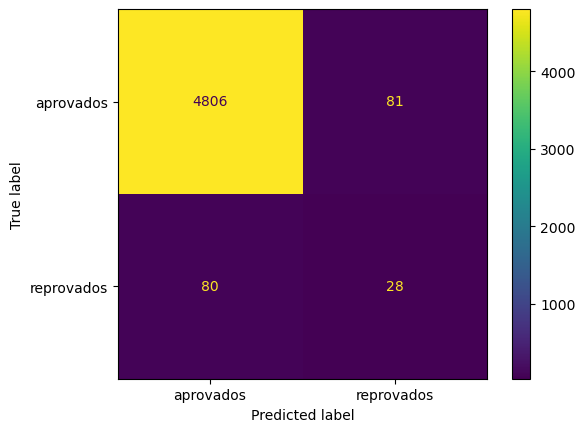

In [142]:
# 3.2. Produzir a visualização da matriz de confusão para a base de teste 
# Visualizando a matriz de confusão na base de teste
ConfusionMatrixDisplay.from_predictions(y_test, pred_test, display_labels=["aprovados", "reprovados"])
plt.show()

In [150]:
# 3.3.1. Calcular a acurácia da base de teste
accuracy_test = accuracy_score(y_test, pred_test)
print(f"Acurácia na base de teste: {accuracy_test:.2f}")

Acurácia na base de teste: 0.97


In [152]:
# 3.3.2. Comparar com a acurácia da base de treinamento
print(f"Acurácia na base de treinamento: {accuracy_train:.2f}")
print(f"Acurácia na base de teste: {accuracy_test:.2f}")

Acurácia na base de treinamento: 0.99
Acurácia na base de teste: 0.97


In [154]:
# 3.4.1. Treinar uma nova árvore com parâmetros específicos
# Treinando uma nova árvore de decisão
clf_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_new.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

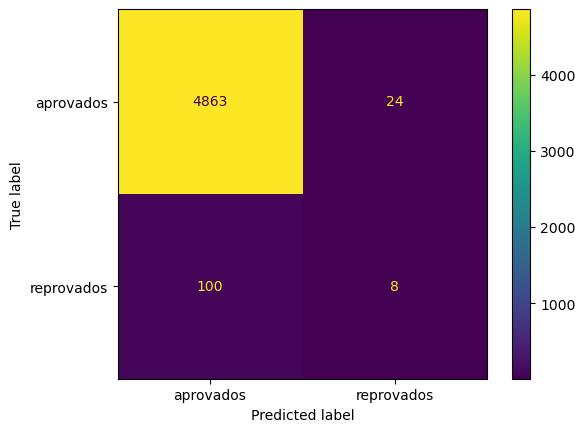

In [156]:
# 3.4.2. Avaliar a matriz de classificação com a nova árvore
# Fazendo previsões com a nova árvore na base de teste
pred_test_new = clf_new.predict(X_test)

# Visualizando a matriz de confusão com a nova árvore
ConfusionMatrixDisplay.from_predictions(y_test, pred_test_new, display_labels=["aprovados", "reprovados"])
plt.show()

In [158]:
# 3.4.3 Observar a Distribuição da Predição
# Calculando a proporção de proponentes classificados como "maus"
proporcao_maus = np.mean(pred_test_new == 1)
print(f"Proporção de proponentes classificados como 'maus': {proporcao_maus:.2f}")

Proporção de proponentes classificados como 'maus': 0.01


Apenas 0.01% dos dados foram preditos como 'maus'

In [160]:
# 3.5 Acurácia Classificando Todos como "Bons"
# Suponha que "bons" sejam representados por 0
pred_todos_bons = np.zeros_like(y_test)

# Calculando a acurácia para a classificação de todos como "bons"
accuracy_todos_bons = accuracy_score(y_test, pred_todos_bons)
print(f"Acurácia classificando todos os contratos como 'bons': {accuracy_todos_bons:.2f}")

Acurácia classificando todos os contratos como 'bons': 0.98
